# Problem Statement: To predict the Food Ratings


## Import Libraries

In [ ]:
# Data wrangling
import numpy as np
import pandas as pd

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import GenericUnivariateSelect,mutual_info_classif,SelectKBest
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report,mean_absolute_error
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

# Exploratory Data Analysis

### Examine data

In [ ]:
print("TRAIN DATA:", train.shape)
print("TEST DATA:", test.shape)

TRAIN DATA: (13636, 15)
TEST DATA: (4546, 14)


In [ ]:
train.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review'],
      dtype='object')

In [ ]:
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [ ]:
features = list(train.columns.values)
print('Total Features:',len(features))
print()
features

Total Features: 15



['ID',
 'RecipeNumber',
 'RecipeCode',
 'RecipeName',
 'CommentID',
 'UserID',
 'UserName',
 'UserReputation',
 'CreationTimestamp',
 'ReplyCount',
 'ThumbsUpCount',
 'ThumbsDownCount',
 'Rating',
 'BestScore',
 'Recipe_Review']

In [ ]:
train.dtypes.value_counts()

int64     10
object     5
dtype: int64

### There are 14 features and 1 target variable
### There are 5 categorical variables


In [ ]:
# Missing values and data type
print(train.info())
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB
None

<class 'pandas.core.frame.DataFrame

In [ ]:
# Summary statistics
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,13636.0,1.210853e+02,1.169956e+02,0.000000e+00,4.500000e+01,9.100000e+01,1.480000e+02,7.240000e+02
RecipeNumber,13636.0,3.862438e+01,2.967235e+01,1.000000e+00,1.200000e+01,3.300000e+01,6.300000e+01,1.000000e+02
RecipeCode,13636.0,2.178599e+04,2.388319e+04,3.860000e+02,6.504000e+03,1.460000e+04,3.312100e+04,1.917750e+05
UserReputation,13636.0,2.160311e+00,1.008642e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+02
CreationTimestamp,13636.0,1.623713e+09,5.444020e+06,1.613035e+09,1.622717e+09,1.622718e+09,1.622718e+09,1.665756e+09
ReplyCount,13636.0,1.452039e-02,1.373234e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
ThumbsUpCount,13636.0,1.098269e+00,4.166487e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+01
ThumbsDownCount,13636.0,5.437078e-01,3.265660e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02
Rating,13636.0,4.288721e+00,1.544839e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
BestScore,13636.0,1.531279e+02,1.409869e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,9.460000e+02


In [ ]:
train.Rating.unique()

array([5, 3, 4, 0, 2, 1])

In [ ]:
train.Rating.value_counts()

5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: Rating, dtype: int64

## Dataset is highly imbalanced

# Checking for Missing Values

In [ ]:
train.replace("?",np.nan,inplace=True)
train.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [ ]:
train.loc[train['Recipe_Review'].isnull()]

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
2984,299,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_260817,u_1oKXz42APTrXTFF6SGvR3YMBJGy,TRGriggs,1,1622717652,0,0,0,5,100,NaN
11654,344,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_260955,u_1oKZmfyycO3xVnQeffIKHuaKT2U,No.1FamilyBaker,1,1622717645,0,0,0,5,100,NaN


In [ ]:
train.iloc[2983]

ID                                                               117
RecipeNumber                                                      59
RecipeCode                                                       414
RecipeName                                     Lemon Blueberry Bread
CommentID                                   sp_aUSaElGf_414_c_151856
UserID                                 u_1oKWu8jLL3DdibzKGSnWK17yUCG
UserName                                                  MAJcooking
UserReputation                                                     1
CreationTimestamp                                         1622717067
ReplyCount                                                         0
ThumbsUpCount                                                      0
ThumbsDownCount                                                    0
Rating                                                             5
BestScore                                                        100
Recipe_Review        Great use of 

<Axes: >

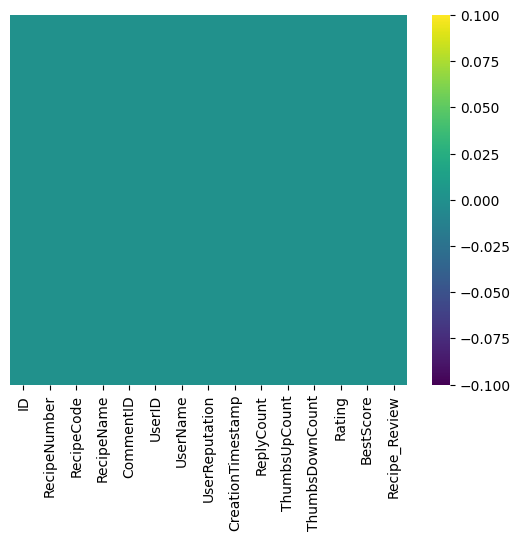

In [ ]:
train.dropna(inplace=True)
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'RecipeNumber'}>,
        <Axes: title={'center': 'RecipeCode'}>],
       [<Axes: title={'center': 'UserReputation'}>,
        <Axes: title={'center': 'CreationTimestamp'}>,
        <Axes: title={'center': 'ReplyCount'}>],
       [<Axes: title={'center': 'ThumbsUpCount'}>,
        <Axes: title={'center': 'ThumbsDownCount'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'BestScore'}>, <Axes: >, <Axes: >]],
      dtype=object)

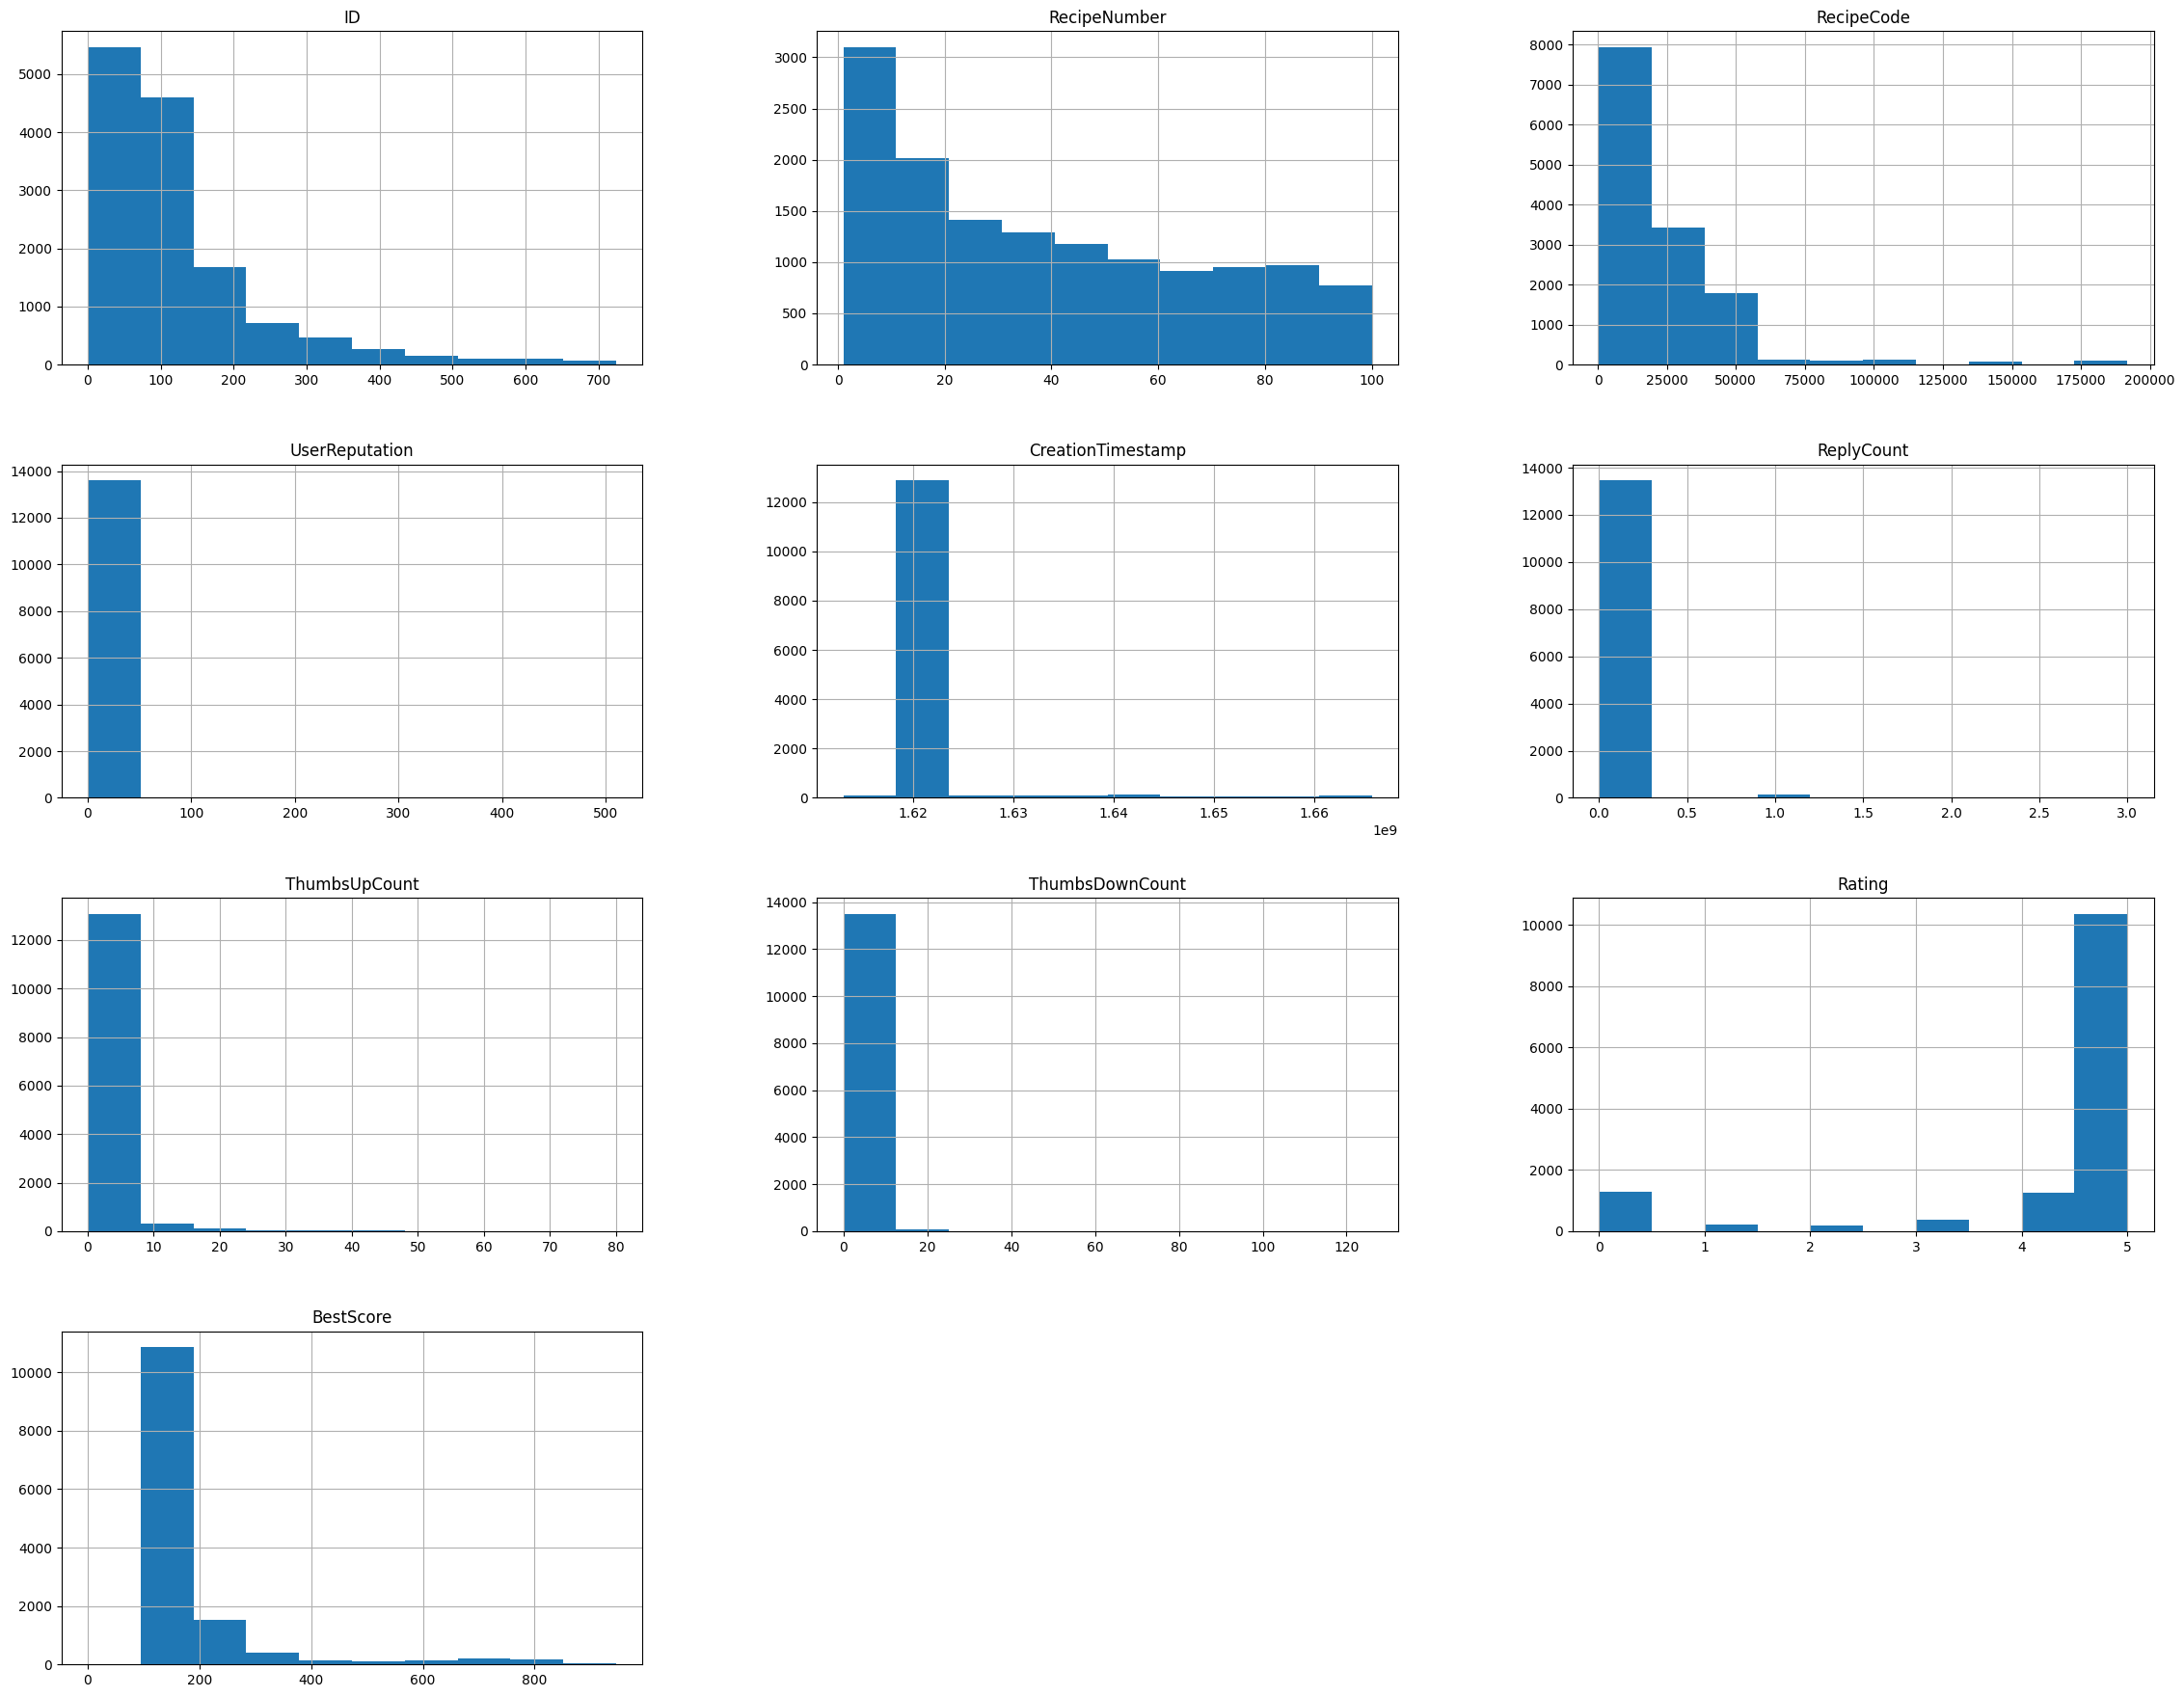

In [ ]:
train.hist(figsize=(28,22))

In [ ]:
numeric = train.select_dtypes(include=['float64', 'int64']).columns
categorical = train.select_dtypes(include=['object']).columns

print('Numerical Features:',numeric)
print()
print('Categorical Features:',categorical)

Numerical Features: Index(['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation',
       'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',
       'Rating', 'BestScore'],
      dtype='object')

Categorical Features: Index(['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review'], dtype='object')


### correlation matrix

<Axes: >

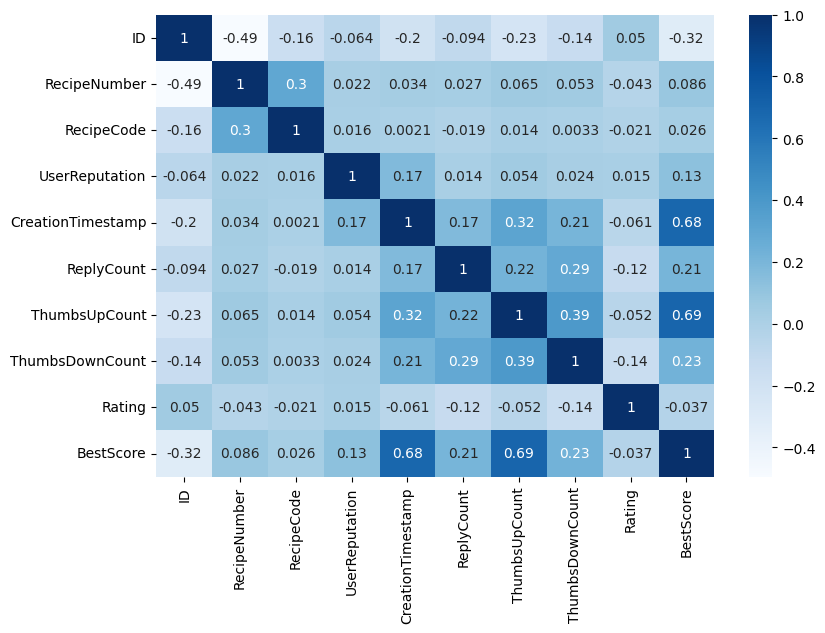

In [ ]:
numeric = train.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train[numeric].corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr_matrix, annot= True,xticklabels=True,yticklabels=True,cmap='Blues')

<Axes: xlabel='Rating', ylabel='count'>

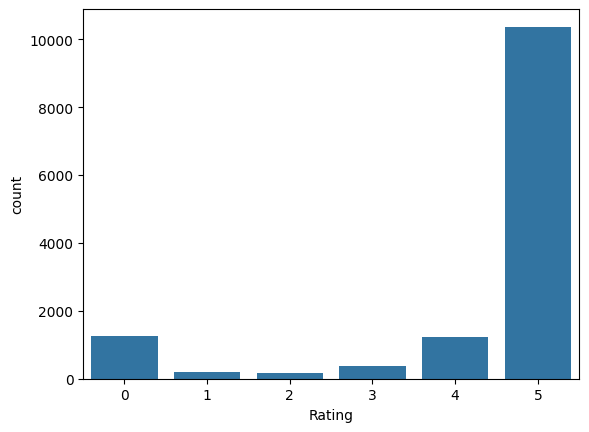

In [ ]:
sns.countplot(x='Rating',data=train)

<Axes: xlabel='Rating', ylabel='ThumbsDownCount'>

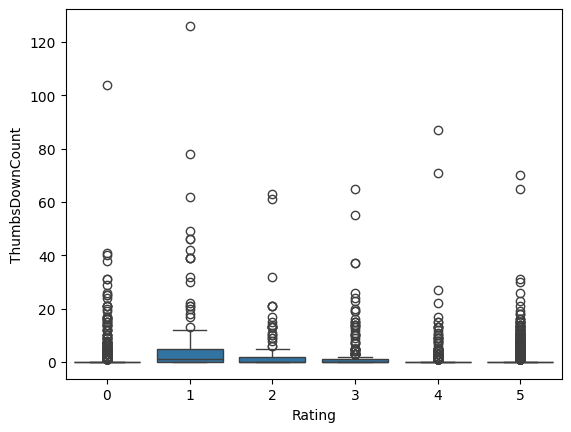

In [ ]:
# checking if there are any outliers
sns.boxplot(x='Rating', y='ThumbsDownCount',data=train)

In [ ]:
#splitting the train dataset into X and y
X = train.drop('Rating',axis=1)
y = train['Rating']

In [ ]:
#As the commentID,UserID,UserName doesnt effect the ratings,drop them
X_new = X.drop(['CommentID','UserID','UserName'],axis=1,inplace=True)

In [ ]:
X.head()

,ID,RecipeNumber,RecipeCode,RecipeName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,20,1622717078,0,0,0,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,1,1622717852,0,0,1,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,1,1622717357,0,0,0,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,1,1622648899,0,0,0,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,1,1622718260,0,0,0,100,Great basic recipe. I added 2 teaspoons Tuscan...


## Splitting of dataset into train and test data

In [ ]:
Xtrain,Xval,ytrain,yval = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)
print(Xtrain.shape, Xval.shape)
print(ytrain.shape,yval.shape)

(10907, 11) (2727, 11)
(10907,) (2727,)


In [ ]:
Xtrain.head()

,ID,RecipeNumber,RecipeCode,RecipeName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
8376,132,43,33457,Chunky Apple Cake,1,1622718212,0,0,0,100,WVALLJ -I think that applesauce would be an id...
8945,103,45,41384,Black Bean ‘n’ Pumpkin Chili,1,1622718167,0,0,0,100,when i make chili i brown the meat then add al...
12430,109,12,19731,Cauliflower Soup,1,1622718367,0,0,0,100,So easy and good! I substituted broccoli for ...
532,76,41,35948,Caramel-Pecan Cheesecake Pie,1,1622717592,0,0,0,100,"My pie did not turn out as expected, was very ..."
12109,99,36,1196,Pumpkin Bread,1,1622718059,0,0,0,100,"Very delicious and moist, I cut the sugar down..."


In [ ]:
# splitting the datatypes for train part
Xtrain_num = Xtrain.drop(['Recipe_Review','RecipeName'],axis=1)
Xtrain_txt = Xtrain['Recipe_Review']
Xtrain_cat = Xtrain[['RecipeName']]


#splitting the datatypes for testpart as well
Xval_num = Xval.drop(['Recipe_Review','RecipeName'],axis=1)
Xval_txt = Xval['Recipe_Review']
Xval_cat = Xval[['RecipeName']]


In [ ]:
Xtrain_txt.head()

8376     WVALLJ -I think that applesauce would be an id...
8945     when i make chili i brown the meat then add al...
12430    So easy and good!  I substituted broccoli for ...
532      My pie did not turn out as expected, was very ...
12109    Very delicious and moist, I cut the sugar down...
Name: Recipe_Review, dtype: object

## Data Preprocessing

In [ ]:
# Transforming the text column into number array
tfidf = TfidfVectorizer(encoding='utf-8',decode_error='ignore',sublinear_tf=True)


In [ ]:
Xtrain_txt_vec = tfidf.fit_transform(Xtrain_txt)


Xval_txt_vec = tfidf.transform(Xval_txt)

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

lsa_model = make_pipeline(TruncatedSVD(n_components=100),Normalizer(copy=False))

In [ ]:
Xtrain_txt_vec_lsa = lsa_model.fit_transform(Xtrain_txt_vec)


Xval_txt_vec_lsa = lsa_model.transform(Xval_txt_vec)

In [ ]:
Xtrain_txt_vec_lsa.shape

(10907, 100)

In [ ]:
Xtrain.shape,Xtrain_txt_vec.shape

((10907, 11), (10907, 9425))

In [ ]:
Xval.shape,Xval_txt_vec.shape

((2727, 11), (2727, 9425))

In [ ]:
Xtrain_cat = pd.get_dummies(Xtrain_cat,columns=['RecipeName'])
Xval_cat = pd.get_dummies(Xval_cat,columns=['RecipeName'])

In [ ]:
##To perform scaling for numerical

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Using pipeline for standardscaler
pipe_ss = Pipeline([('ss',StandardScaler())])

#scaling the numerical columns
Xtrain_num_ss = pipe_ss.fit_transform(Xtrain_num)
Xval_num_ss = pipe_ss.fit_transform(Xval_num)

In [ ]:
print(Xtrain_cat.shape,Xval_cat.shape)
print(Xtrain_num_ss.shape,Xval_num_ss.shape)

(10907, 100) (2727, 100)
(10907, 9) (2727, 9)


In [ ]:
type(Xtrain_txt_vec_lsa)

numpy.ndarray

In [ ]:
# Stacking both numerical and text columns
Xtrain_stacked = np.hstack([Xtrain_num_ss,Xtrain_cat.to_numpy(),Xtrain_txt_vec_lsa])

Xval_stacked = np.hstack([Xval_num_ss,Xval_cat.to_numpy(),Xval_txt_vec_lsa])

### Feature selection process

In [ ]:
gs = GenericUnivariateSelect(mutual_info_classif,param =20)
X_new_fs =gs.fit_transform(Xtrain_stacked,ytrain)

In [ ]:
X_new_fs.shape

(10907, 42)

# Model Fitting

### Storing all the accuracy scores, errors

In [ ]:
Scores = {}
Errors = {}
Submissions ={}

# MODEL 1 - LOGISTIC REGRESSION

## Without Hyper-Parameters

In [ ]:
lr = LogisticRegression()
lr.fit(X_new_fs,ytrain)
print('Training Score:',lr.score(X_new_fs,ytrain));
#Feature selection makes the model underfitting
# Training Score: 0.7651049784542038

Training Score: 0.7647382414962868


## Key point
### Feature selection makes the model underfitting

In [ ]:
lr = LogisticRegression()
lr.fit(Xtrain_stacked,ytrain)
print('Training Score:',lr.score(Xtrain_stacked,ytrain));
# Training Score: 0.7864674062528652

Training Score: 0.784450352984322


In [ ]:
ytrain.shape,yval.shape

((10907,), (2727,))

In [ ]:
Xtrain_stacked.shape,Xval_stacked.shape

((10907, 209), (2727, 209))

In [ ]:
ypred = lr.predict(Xval_stacked)

print('Training Accuracy:',lr.score(Xtrain_stacked,ytrain))

lr_ypred = lr.predict_proba(Xval_stacked)
lr_ypred_prob = np.argmax(lr_ypred, axis=1)

Score = accuracy_score(lr_ypred_prob,yval)
Error = mean_absolute_error(yval,lr_ypred_prob)

print("Validation Score:",Score)
print('Validation Error:',Error)

Scores['LogisticRegressor'] = Score
Errors['LogisticRegressor'] = Error
# Training Accuracy: 0.7886872020535387
# Validation Score: 0.7690615835777126

#Submission Test score on kaggle:0.77034
Submissions['LogisticRegressor'] = 0.77034

              precision    recall  f1-score   support

           0       0.50      0.16      0.25       238
           1       0.38      0.12      0.19        41
           2       0.30      0.07      0.12        40
           3       0.25      0.06      0.10        78
           4       0.35      0.10      0.16       248
           5       0.80      0.98      0.88      2082

    accuracy                           0.78      2727
   macro avg       0.43      0.25      0.28      2727
weighted avg       0.71      0.78      0.72      2727



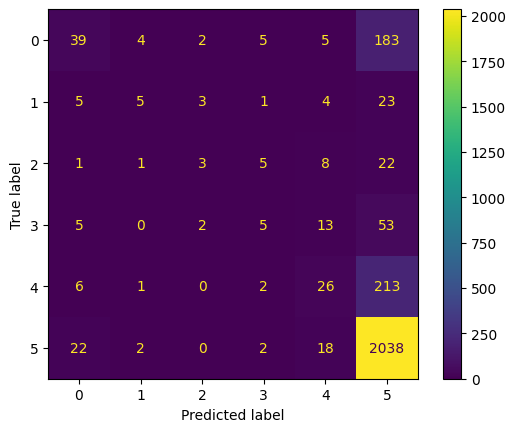

In [ ]:
print(classification_report(yval,lr_ypred_prob))
print(ConfusionMatrixDisplay.from_predictions(yval,lr_ypred_prob))

# With Hyper parameters

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# max_iter = range(100, 500)
# solver = ['lbfgs', 'newton-cg', 'liblinear']
# warm_start = [True, False]
# C = np.arange(0, 1, 0.01)
# penalty =['l1','l2']
# random_grid ={
#     'max_iter' : max_iter,
#     'warm_start' : warm_start,
#     'solver' : solver,
#     'C' : C
# }

# random_estimator = RandomizedSearchCV(estimator = lr,
#                                    param_distributions = random_grid,
#                                    n_iter = 100,
#                                    scoring = 'accuracy',
#                                    n_jobs = -1,
#                                    verbose = 1,
#                                    random_state = 1,
#                                   )

# random_estimator.fit(Xtrain_stacked, ytrain)


In [ ]:
# print(random_estimator.best_params_)

# best_rscv_estimator = random_estimator.best_estimator_
# best_rscv_estimator.fit(Xtrain_stacked, ytrain)

### Best parameters for Log Reg
    {'warm_start': False, 'solver': 'newton-cg', 'max_iter': 239, 'C': 0.53}



In [ ]:
best_lr_model = LogisticRegression(warm_start=False,
                                   solver= 'newton-cg',
                                   max_iter= 239,
                                   C= 0.53)

best_lr_model.fit(Xtrain_stacked,ytrain)

print("Training Score:",best_lr_model.score(Xtrain_stacked,ytrain))


lr_hpt_ypred = lr.predict_proba(Xval_stacked)
lr_hpt_ypred_prob = np.argmax(lr_hpt_ypred, axis=1)

Error = mean_absolute_error(yval,lr_hpt_ypred_prob)
print("Validation Score:",Score)
print('Validation Error:',Error)
Scores['LogisticRegressor_hpt'] = Score
Errors['LogisticRegressor_hpt'] = Error

# Training Score: 0.7846534653465347
# Validation Score: 0.7690615835777126
# Validation Error: 0.658724340175953

#Submission Test score on kaggle:0.76902
Submissions['LogisticRegressor_hpt'] = 0.76902

Training Score: 0.7815164573209865
Validation Score: 0.7759442610927759
Validation Error: 0.6160616061606161


              precision    recall  f1-score   support

           0       0.50      0.16      0.25       238
           1       0.38      0.12      0.19        41
           2       0.30      0.07      0.12        40
           3       0.25      0.06      0.10        78
           4       0.35      0.10      0.16       248
           5       0.80      0.98      0.88      2082

    accuracy                           0.78      2727
   macro avg       0.43      0.25      0.28      2727
weighted avg       0.71      0.78      0.72      2727



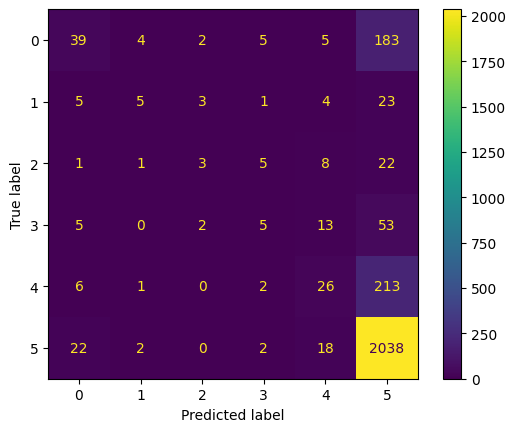

In [ ]:
print(classification_report(yval,ypred))
print(ConfusionMatrixDisplay.from_predictions(yval,ypred))

# Model 2 KNN Classifier


## Without hyper parameter tuning

In [ ]:
knn = KNeighborsClassifier()
knn.fit(Xtrain_stacked,ytrain)

ypred = knn.predict(Xval_stacked)

print('Training score:',knn.score(Xtrain_stacked,ytrain))
print('Validation score:',accuracy_score(yval,ypred))

Score = accuracy_score(ypred,yval)
Error = mean_absolute_error(yval,ypred)

Scores['KNNClassifier'] = Score
Errors['KNNClassifier'] = Error

# Training score: 0.8046208856697533
# Validation score: 0.7367070040337367

#Submission Test score on kaggle:0.72701
Submissions['KNNClassifier'] = 0.72701

Training score: 0.8032456220775649
Validation score: 0.7352401906857352


## With Hyper-parameter tuning

In [ ]:
# params = {'n_neighbors':[1,3,5,7,9,11],'weights':['uniform','distance'],
#           'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
# knn_gs = GridSearchCV(knn ,params ,cv=4 , scoring = 'accuracy',
#                                           n_jobs = 1,
#                                            verbose = 1)
# knn_gs.fit(Xtrain_stacked,ytrain)


In [ ]:
# print(knn_gs.best_params_)

### Best parameters for knn classifier are
    {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}

In [ ]:
best_knn_model = KNeighborsClassifier(algorithm= 'auto',
                                          n_neighbors = 11,
                                          weights= 'distance')
best_knn_model.fit(Xtrain_stacked, ytrain)

print("Training Score:",best_knn_model.score(Xtrain_stacked,ytrain))

ypred = best_knn_model.predict(Xval_stacked)
Score = accuracy_score(ypred,yval)
Error = mean_absolute_error(yval,ypred)

print("Validation Score:",Score)
print('Validation Error:',Error)
Scores['KNNClassifier_hpt'] = Score
Errors['KNNClassifier_hpt'] = Error

# Training Score: 1.0
# Validation Score: 0.773010634396773
# Validation Error: 0.6325632563256326

#Submission score on kaggle: 0.7765
Submissions['KNNClassifier_hpt'] = 0.7765

Training Score: 1.0
Validation Score: 0.7697103043637697
Validation Error: 0.6354968830216355


In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(Xtrain_stacked,ytrain)

print("Training Score:",svm.score(Xtrain_stacked,ytrain))

ypred = svm.predict(Xval_stacked)
Score = accuracy_score(ypred,yval)
Error = mean_absolute_error(yval,ypred)

print("Validation Score:",Score)
print('Validation Error:',Error)
Scores['SVM'] = Score
Errors['SVM'] = Error

Training Score: 0.7756486659943156
Validation Score: 0.7667766776677668
Validation Error: 0.6633663366336634


In [ ]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}
# svm_gs = GridSearchCV(svm,param_grid ,cv=3,scoring='accuracy')
# svm_gs.fit(Xtrain_stacked,ytrain)
# svm_gs.best_params_

In [ ]:
from sklearn.svm import SVC

svm = SVC(C=10 , gamma=0.1,kernel='rbf')
svm.fit(Xtrain_stacked,ytrain)

print("Training Score:",svm.score(Xtrain_stacked,ytrain))

ypred = svm.predict(Xval_stacked)
Score = accuracy_score(ypred,yval)
Error = mean_absolute_error(yval,ypred)

print("Validation Score:",Score)
print('Validation Error:',Error)
Scores['SVM_hpt'] = Score
Errors['SVM_hpt'] = Error

Training Score: 0.8770514348583478
Validation Score: 0.7785111844517785
Validation Error: 0.6028602860286029


## Model-3 DecisionTree

## Without Hyper parameters

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain_stacked,ytrain)
print('Training Score:',dt.score(Xtrain_stacked,ytrain))

ypred = dt.predict(Xval_stacked)
print('Validation score:',accuracy_score(ypred,yval))

Scores['DecisionTree'] = Score
Errors['DecisionTree'] = Error

# Training Score: 1.0
# Validation score: 0.6648331499816649

#not submitted on kaggle as it the least preferred model

Training Score: 1.0
Validation score: 0.6490649064906491


### Result: DecisionTree model is overfitting

# Model 4: RandomForest Classifier

### Without Hyper-Parameters

In [ ]:
rf = RandomForestClassifier()
rf.fit(Xtrain_stacked,ytrain)
print("Train Score:",rf.score(Xtrain_stacked,ytrain))

#on validation
ypred = rf.predict(Xval_stacked)

Score = accuracy_score(ypred,yval)
Error = mean_absolute_error(yval,ypred)

print("Validation Score:",Score)
print('Validation Error:',Error)

Scores['RandomForest'] = Score
Errors['RandomForest'] = Error

# Train Score: 1.0
# Validation Score: 0.7726439310597727
# Validation Error: 0.6508984231756509

#Submission score on kaggle:0.77012
Submissions['RandomForest'] = 0.77012

Train Score: 1.0
Validation Score: 0.7697103043637697
Validation Error: 0.6615328199486615


### With Hyper parameter tuning

In [ ]:
# rf = RandomForestClassifier(random_state=42)
# params = {'n_estimators': [100, 200], 'max_depth': [10, 20]}

# rfr_grid = GridSearchCV(estimator= rf,
#                         param_grid= params,
#                         cv=3, scoring='accuracy')

# rfr_grid.fit(Xtrain_stacked, ytrain)

# Best_parameters = rfr_grid.best_params_
# print(Best_parameters)

### Best parameters for RandomForest are:
    {'max_depth': 20, 'n_estimators': 200}
   


In [ ]:
# best_rf_model = RandomForestClassifier(max_depth=20,n_estimators=200)

# best_rf_model.fit(Xtrain_stacked, ytrain)

# print("Training Score:",best_dt_model.score(Xtrain_stacked,ytrain))

# ypred = best_rf_model.predict(Xval_stacked)
# Score = accuracy_score(ypred,yval)
# Error = mean_absolute_error(yval,ypred)

# print("Validation Score:",Score)
# print('Validation Error:',Error)

# Scores['RandomForest_hpt'] = Score
# Errors['RandomForest_hpt'] = Error


# # Training Score: 0.7597872925644081
# # Validation Score: 0.7656765676567657
# # Validation Error: 0.6776677667766776
# #Hyper parameter tuning leads to decrease in accuracy in randomforest

## Model 4 -XGboost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(Xtrain_stacked,ytrain)
print('Training Score:',xgb_model.score(Xtrain_stacked,ytrain))

xgb_ypred = xgb_model.predict(Xval_stacked)


print('Validation Score:',accuracy_score(yval,xgb_ypred))

Score = accuracy_score(xgb_ypred,yval)
Error = mean_absolute_error(yval,xgb_ypred)

Scores['XGBoost'] = Score
Errors['XGBoost'] = Error
# Training Score: 0.9985330521683322
# Validation Score: 0.7836450311697837

Training Score: 0.9988997891262492
Validation Score: 0.784011734506784


In [ ]:
# params = {'n_estimators': [100,200], 'max_depth':[5,7,9], 'learning_rate': np.arange(0,1,0.01)}
# xgb_grid = GridSearchCV(estimator= xgb_model,
#                         param_grid= params, cv=3,
#                         scoring='accuracy',
#                         n_jobs= 2)

# xgb_grid.fit(Xtrain_stacked, ytrain)

# print(xgb_grid.best_params_)

### Best parameters of XGBoostClassifier are :
    {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}

Training Score: 0.9988997891262492
Validation Score: 0.7825449211587825
Validation Error: 0.5911257792445911
              precision    recall  f1-score   support

           0       0.60      0.23      0.33       238
           1       0.38      0.07      0.12        41
           2       0.50      0.05      0.09        40
           3       0.50      0.08      0.13        78
           4       0.31      0.05      0.09       248
           5       0.80      0.99      0.88      2082

    accuracy                           0.78      2727
   macro avg       0.51      0.24      0.27      2727
weighted avg       0.72      0.78      0.72      2727



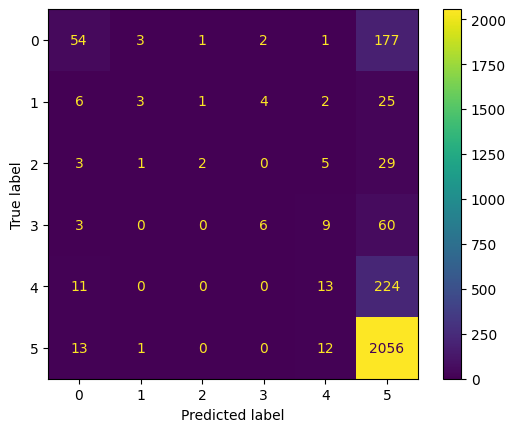

In [ ]:
xgb_best_model = xgb.XGBClassifier(learning_rate= 0.2,
                                   max_depth= 7,
                                   n_estimators= 100,
                                   random_state=42)
xgb_best_model.fit(Xtrain_stacked,ytrain)

print('Training Score:',xgb_best_model.score(Xtrain_stacked,ytrain))

#on validation
ypred = xgb_best_model.predict(Xval_stacked)

Score = accuracy_score(ypred,yval)
Error = mean_absolute_error(yval,ypred)

print("Validation Score:",Score)
print('Validation Error:',Error)

Scores['XGBoost_hpt'] = Score
Errors['Xgboost_hpt'] = Error

print(classification_report(yval,ypred))
print(ConfusionMatrixDisplay.from_predictions(yval,ypred))

# Training Score: 0.939121664985789
# Validation Score: 0.7774110744407774

#Submission score in kaggle is 0.7809

Submissions['XGBoost_hpt'] = 0.7809

# light gbm

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(Xtrain_stacked,ytrain)
print('Training Score:',lgb_model.score(Xtrain_stacked,ytrain))

lgb_ypred = lgb_model.predict(Xval_stacked)

print('Validation Score:',accuracy_score(yval,lgb_ypred))

Score = accuracy_score(lgb_ypred,yval)
Error = mean_absolute_error(yval,lgb_ypred),

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26759
[LightGBM] [Info] Number of data points in the train set: 10907, number of used features: 208
[LightGBM] [Info] Start training from score -2.355970
[LightGBM] [Info] Start training from score -4.167261
[LightGBM] [Info] Start training from score -4.399320
[LightGBM] [Info] Start training from score -3.627279
[LightGBM] [Info] Start training from score -2.396429
[LightGBM] [Info] Start training from score -0.274717
Training Score: 0.9933070505180159
Validation Score: 0.7785111844517785


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26759
[LightGBM] [Info] Number of data points in the train set: 10907, number of used features: 208
[LightGBM] [Info] Start training from score -2.355970
[LightGBM] [Info] Start training from score -4.167261
[LightGBM] [Info] Start training from score -4.399320
[LightGBM] [Info] Start training from score -3.627279
[LightGBM] [Info] Start training from score -2.396429
[LightGBM] [Info] Start training from score -0.274717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

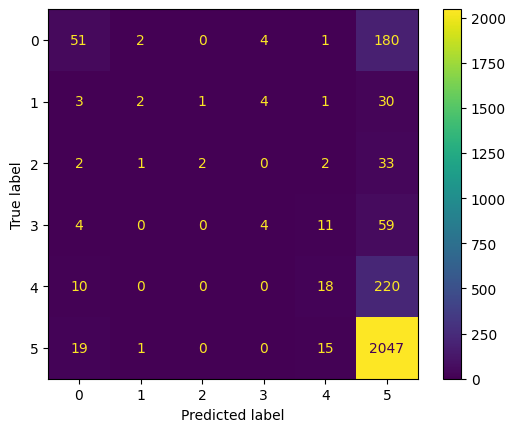

In [ ]:
lgb_best_model = lgb.LGBMClassifier(learning_rate= 0.1,
                                   n_estimators= 200,
                                   random_state=42)
lgb_best_model.fit(Xtrain_stacked,ytrain)

print('Training Score:',xgb_best_model.score(Xtrain_stacked,ytrain))

#on validation
ypred = lgb_best_model.predict(Xval_stacked)

Score = accuracy_score(ypred,yval)
Error = mean_absolute_error(yval,ypred)

print("Validation Score:",Score)
print('Validation Error:',Error)

Scores['lgb_hpt'] = Score
Errors['lgb_hpt'] = Error

print(classification_report(yval,ypred))
print(ConfusionMatrixDisplay.from_predictions(yval,ypred))

# Training Score: 0.939121664985789
# Validation Score: 0.7774110744407774

#Submission score in kaggle is 0.7809

In [ ]:
# param_grid = {
#     'boosting_type': ['gbdt', 'dart', 'goss'],
#     'num_leaves': [20, 30, 40],
#     'max_depth': [-1, 10, 20],
#     'learning_rate': np.arange(0,1,0.01),
#     'n_estimators': [50, 100, 200],
#     'min_child_samples': [10, 20, 30],
#     'feature_fraction': [0.7, 0.8, 0.9],
#     'bagging_fraction': [0.7, 0.8, 0.9],
#     'lambda_l1': [0, 0.1, 1],
#     'lambda_l2': [0, 0.1, 1],
#     'min_gain_to_split': [0.0, 0.1, 0.2]
# }

# grid_search_lgbm = GridSearchCV(lgb_model,param_grid,cv=3,scoring='accuracy')
# grid_search_lgbm.fit(Xtrain_stacked,ytrain)
# grid_search_lgbm.best_params_

# test


In [ ]:
test = pd.read_csv("/content/test.csv")
test.isnull().sum()
#No null values in the testset

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

In [ ]:
test.drop(['CommentID','UserID','UserName'],axis=1,inplace=True)

In [ ]:
test

,ID,RecipeNumber,RecipeCode,RecipeName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...
...,...,...,...,...,...,...,...,...,...,...,...
4541,152,32,17310,Seafood Lasagna,1,1622717899,0,0,0,100,This is an absolutely wonderful seafood recipe...
4542,121,74,26937,Pineapple Pudding Cake,1,1622717990,0,0,0,100,This us a definite &#34;OMG&#34;. Tastes sinf...
4543,133,73,41095,Contest-Winning New England Clam Chowder,1,1622716903,0,0,0,100,absolutely great....even husband and grandson ...
4544,91,12,19731,Cauliflower Soup,1,1622718289,0,0,1,100,I followed directions. It tastes very bland. V...


In [ ]:
test_num = test.drop(['Recipe_Review','RecipeName'],axis=1)
test_txt = test['Recipe_Review']
test_cat = test['RecipeName']

In [ ]:
test_num

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
0,86,45,41384,1,1622718043,0,0,0,100
1,102,53,3143,1,1622717685,0,0,1,100
2,156,53,3143,1,1622718307,0,0,0,100
3,18,89,1324,1,1622648872,0,4,3,212
4,27,70,32264,1,1622718460,0,0,1,100
...,...,...,...,...,...,...,...,...,...
4541,152,32,17310,1,1622717899,0,0,0,100
4542,121,74,26937,1,1622717990,0,0,0,100
4543,133,73,41095,1,1622716903,0,0,0,100
4544,91,12,19731,1,1622718289,0,0,1,100


In [ ]:
#Using the StandardScaler pipeline on  numericals of test set
test_ss = pipe_ss.fit_transform(test_num)
print(test_ss.shape)

(4546, 9)


In [ ]:
test_txt_vec = tfidf.transform(test_txt)

In [ ]:
test_txt_vec_lsa = lsa_model.transform(test_txt_vec)

In [ ]:
test_txt_vec_lsa.shape

(4546, 100)

In [ ]:
test_cat = pd.get_dummies(test_cat,columns=['RecipeName'])
print(test_cat.shape)

(4546, 100)


In [ ]:
test_stacked =  np.hstack([test_ss,test_cat.to_numpy(),test_txt_vec_lsa])
print(test_stacked.shape)

(4546, 209)


In [ ]:
test_predictions = xgb_model.predict(test_stacked)

In [ ]:
# Prepare submission file
submission = pd.DataFrame({'ID': range(1,len(test_predictions)+1) , 'Rating': test_predictions})
submission.to_csv('submission.csv', index=False)

In [ ]:
print("SCORES:", Scores)
print("ERRORS:", Errors)
print("SUBMISSIONS",Submissions)

SCORES: {'LogisticRegressor': 0.7759442610927759, 'LogisticRegressor_hpt': 0.7759442610927759, 'KNNClassifier': 0.7352401906857352, 'KNNClassifier_hpt': 0.7697103043637697, 'SVM': 0.7667766776677668, 'SVM_hpt': 0.7785111844517785, 'DecisionTree': 0.7785111844517785, 'RandomForest': 0.7697103043637697, 'XGBoost': 0.784011734506784, 'XGBoost_hpt': 0.7825449211587825, 'lgb_hpt': 0.7788778877887789}
ERRORS: {'LogisticRegressor': 0.6160616061606161, 'LogisticRegressor_hpt': 0.6160616061606161, 'KNNClassifier': 0.7198386505317198, 'KNNClassifier_hpt': 0.6354968830216355, 'SVM': 0.6633663366336634, 'SVM_hpt': 0.6028602860286029, 'DecisionTree': 0.6028602860286029, 'RandomForest': 0.6615328199486615, 'XGBoost': 0.5881921525485881, 'Xgboost_hpt': 0.5911257792445911, 'lgb_hpt': 0.6145947928126146}
SUBMISSIONS {'LogisticRegressor': 0.77034, 'LogisticRegressor_hpt': 0.76902, 'KNNClassifier': 0.72701, 'KNNClassifier_hpt': 0.7765, 'RandomForest': 0.77012, 'XGBoost_hpt': 0.7809}


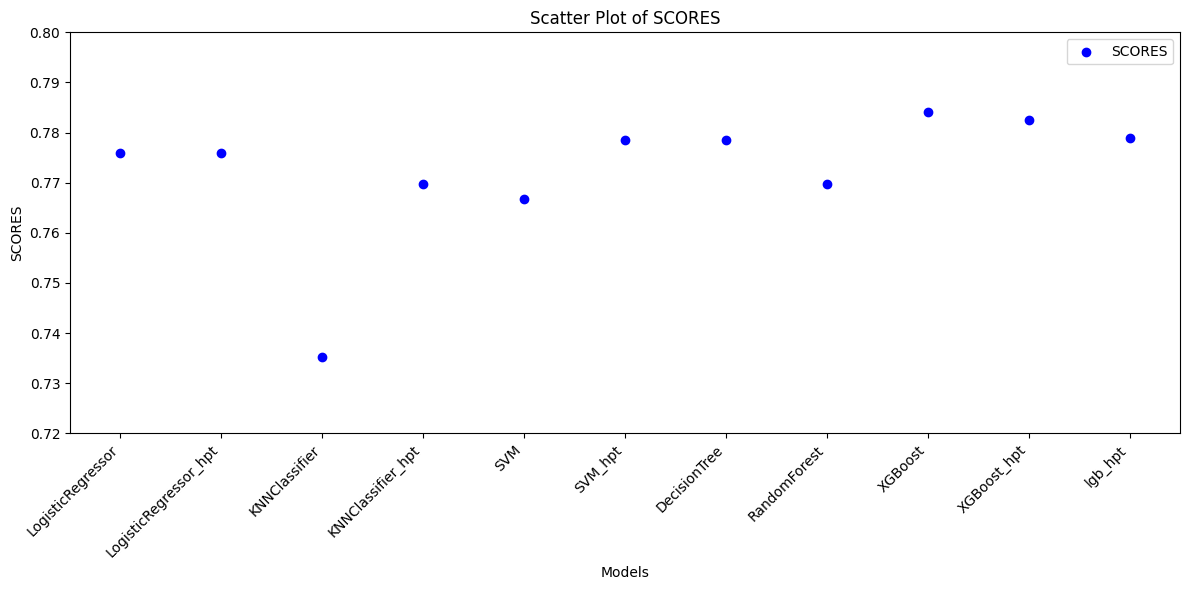

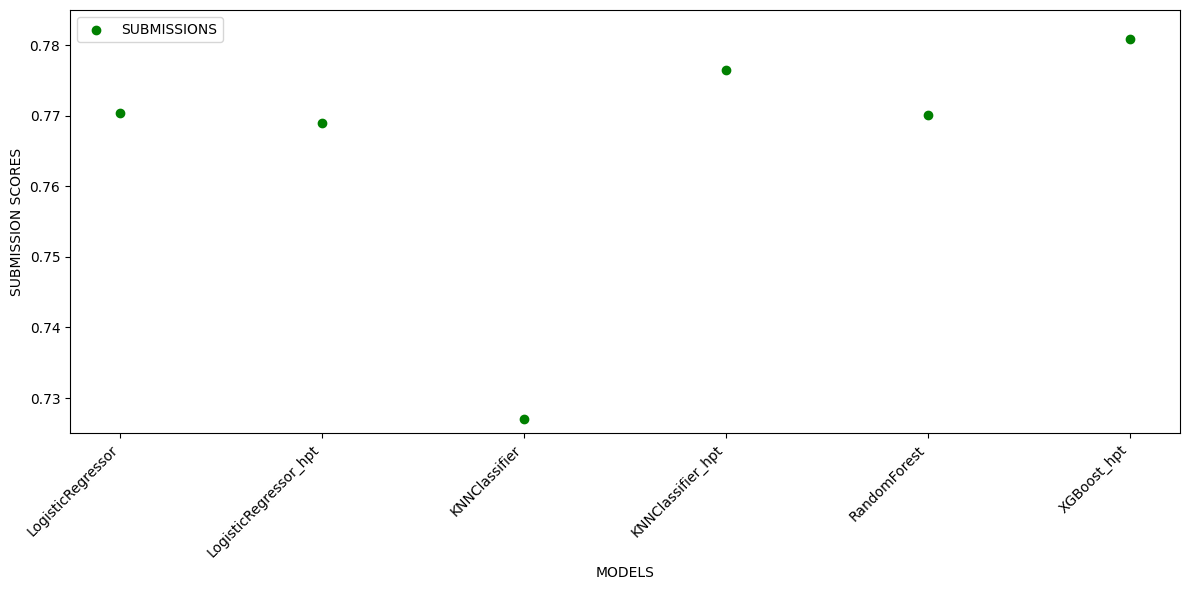

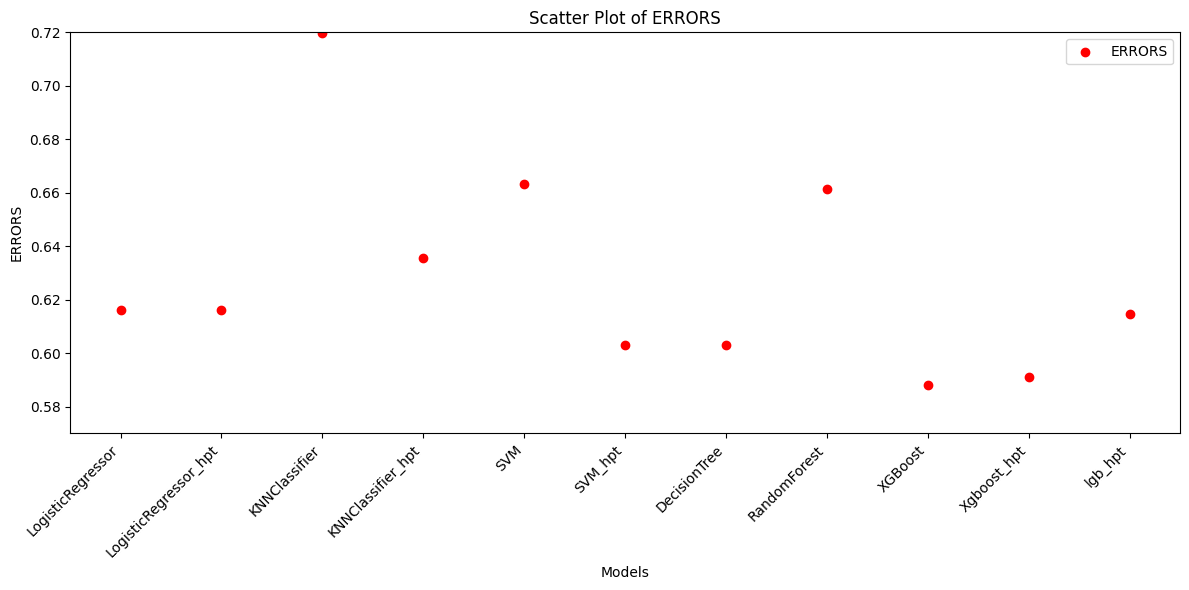

In [ ]:
##Scatter plot for Accuracy Scores

plt.figure(figsize=(12,6))
plt.scatter(list(Scores.keys()), list(Scores.values()), label='SCORES', marker='o', color='blue')
plt.ylim(0.72, 0.8)
plt.xlabel('Models')
plt.ylabel('SCORES')
plt.title('Scatter Plot of SCORES')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

##SCATTER PLOT FOR SUBMISSIONS

plt.figure(figsize=(12,6))
plt.scatter( x = list(Submissions.keys()), y=list(Submissions.values()),label='SUBMISSIONS',marker='o',color='green')
plt.ylim(0.725,0.785)
plt.xlabel('MODELS')
plt.ylabel('SUBMISSION SCORES')
plt.xticks(rotation=45,ha='right')
plt.legend()
plt.tight_layout()
plt.show()

##SCATTER PLOT FOR ERRORS

plt.figure(figsize=(12, 6))
plt.scatter(list(Errors.keys()), list(Errors.values()), label='ERRORS', marker='o', color='red')
plt.ylim(0.57, 0.72)
plt.xlabel('Models')
plt.ylabel('ERRORS')
plt.title('Scatter Plot of ERRORS')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Accuracy of the Models are :
- Logistic Regression
   - Training Accuracy: 0.7768
   - Validation Accuracy: 0.7737

- KNN
   - Training Accuracy: 1.0
   - Validation Accuracy:  0.7730

- Decision Tree
   - Training Score: 1.0
   - Validation score: 0.7730
  
- Random Forest
    - Training Score: 1.0
    - Validation score: 0.7733

- Gradient Boosting
    - Training Score: 0.8269
    - Validation Score: 0.7704

- XGboost classifier
    - Training Score: 0.9415
    - Validation score: 0.7737

# Conclusion
> **XGBoostClassifier , Logistic Regression and Randomforest classifier are some of the best performing models**

> **Best HyperParameters for XGBoostClassifier:- {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}**

> **Best submission score achieved 0.7809 by XGBoostClassifier**